# Medical Cost Prediction using Linear Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df.sex.replace({'male':1,'female':0}, inplace=True)
df.smoker.replace({'yes':1,'no':0}, inplace=True)
df.region.replace({'southeast':0,'southwest':1,'northeast':2,'northwest':3}, inplace=True)
df

C:\Users\gurub\AppData\Local\Temp\ipykernel_24476\604152582.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sex.replace({'male':1,'female':0}, inplace=True)
C:\Users\gurub\AppData\Local\Temp\ipykernel_24476\604152582.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [22]:
from sklearn.model_selection import train_test_split
med_train, med_test = train_test_split(df, test_size=0.2)


In [23]:
med_train_x = med_train.iloc[:,:-1]
med_train_y = med_train.iloc[:,-1]

med_test_x  = med_test.iloc[:,:-1]
med_test_y  = med_test.iloc[:,-1]


In [ ]:
Train Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(med_train_x, med_train_y)

LinearRegression()

In [ ]:
R² Score

In [25]:
linreg.score(med_train_x, med_train_y)

0.7433910692992916

In [ ]:
Model Equation

In [26]:
linreg.intercept_

np.float64(-11655.842907215509)

In [27]:
linreg.coef_

array([  258.16733282,  -141.20971176,   327.38107281,   518.38925583,
       23775.36638434,  -423.59422619])

In [ ]:
Predictions

In [28]:
pred_train = linreg.predict(med_train_x)
pred_test  = linreg.predict(med_test_x)


In [ ]:
Errors

In [29]:
err_train = med_train_y - pred_train
err_test  = med_test_y - pred_test


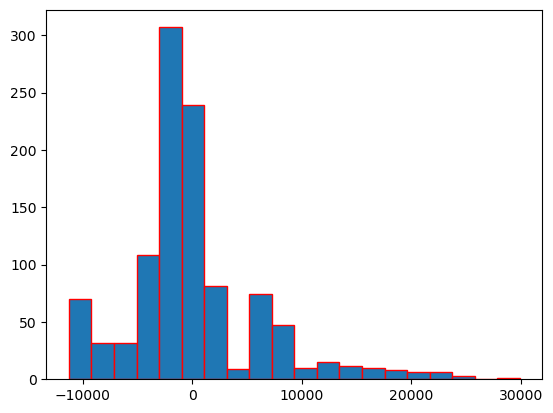

In [30]:
plt.hist(err_train, edgecolor='red', bins=20)
plt.show()


In [34]:
err_train.skew()
err_train.kurtosis()


np.float64(2.8209399278770477)

In [37]:
import seaborn as sns


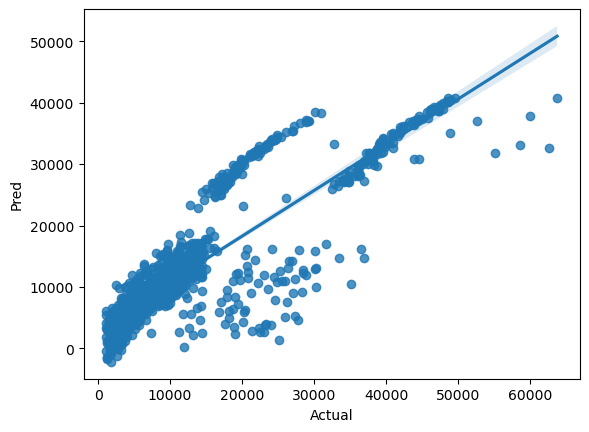

In [38]:
pred_act = pd.DataFrame()
pred_act['Actual'] = med_train_y
pred_act['Pred'] = pred_train

sns.regplot(x='Actual', y='Pred', data=pred_act)
plt.show()


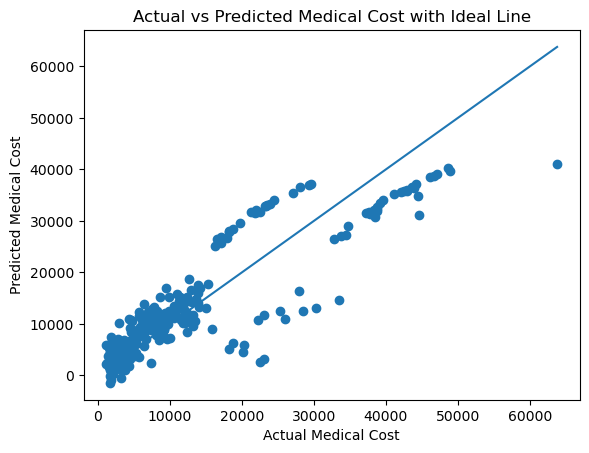

In [36]:
plt.scatter(y_test, y_pred)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.xlabel("Actual Medical Cost")
plt.ylabel("Predicted Medical Cost")
plt.title("Actual vs Predicted Medical Cost with Ideal Line")
plt.show()


In [ ]:
print("Intercept:", model.intercept_)
print("Coefficients:")
pd.DataFrame(model.coef_, X.columns, co                                   lumns=["Weight"])


Intercept: -11946.606567263016
Coefficients:


,Weight
age,257.056264
sex,-18.791457
bmi,335.781491
children,425.091456
smoker,23647.818096
region,-271.284266
